In [1]:
import pandas as pd
import numpy as np
import yaml
import sys
sys.path.append('../')
import logging
import logging.config
import main

In [2]:
def setup_logger():
    with open("../configs/logger_config.yml", "rt") as f:
        config = yaml.safe_load(f.read())
        logging.config.dictConfig(config)
setup_logger()
logger = logging.getLogger()

### 1. Считываем все необходимые конфигурации

In [3]:
with open("../configs/data_links.yml", 'r') as stream:
    datalinks = yaml.safe_load(stream)
with open("../configs/proxy.yml", 'r') as stream:
    proxy = yaml.safe_load(stream)
with open("../configs/train_config_0.yml", 'r') as stream:
    trainConfig_0 = yaml.safe_load(stream)
with open("../configs/train_config_1.yml", 'r') as stream:
    trainConfig_1 = yaml.safe_load(stream)
with open("../configs/train_config_2.yml", 'r') as stream:
    trainConfig_2 = yaml.safe_load(stream)

In [4]:
print(trainConfig_0)
print(trainConfig_1)
print(trainConfig_2)

{'model': 'logisticRegression', 'modelParams': None, 'split_size': 0.1, 'augmentation': False, 'standart': False, 'preproccessing': None}
{'model': 'logisticRegression', 'modelParams': {'C': 3.3, 'solver': 'lbfgs'}, 'split_size': 0.1, 'augmentation': True, 'standart': True, 'preproccessing': ['X * X,X^2', 'Y * Y,Y^2', 'Z * Z,Z^2', 'dX * dX,dX^2', 'dY * dY,dY^2', 'dZ * dZ,dZ^2', 'X ** 3,X^3', 'Y ** 3,Y^3', 'Z ** 3,Z^3', 'dX ** 3,dX^3', 'dY ** 3,dY^3', 'dZ ** 3,dZ^3']}
{'model': 'lgbm', 'modelParams': {'objective': 'binary', 'num_leaves': 50, 'feature_fraction': 0.9, 'bagging_fraction': 0.9, 'learning_rate': 0.1, 'lambda_l2': 100, 'metric': 'auc'}, 'split_size': 0.1, 'augmentation': False, 'standart': False, 'preproccessing': None}


### 2. Запускаем весь процесс

Сначала посмоторим на логрегрессию без генерации новых признаков

05.05 21:04 - traim config: {'model': 'logisticRegression', 'modelParams': None, 'split_size': 0.1, 'augmentation': False, 'standart': False, 'preproccessing': None}


C:\Users\aaakim10\AppData\Local\Continuum\anaconda3\envs\fraud_env\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bproxy.msk.mts.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\aaakim10\AppData\Local\Continuum\anaconda3\envs\fraud_env\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bproxy.msk.mts.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\aaakim10\AppData\Local\Continuum\anaconda3\envs\fraud_env\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bproxy.msk.mts.ru'. Adding certificate verification is strongly advised. See:

05.05 21:04 - Downloaded "https://disk.yandex.ru/d/T5CgXLvMYb0kxQ" to "../downloads/train.csv"
05.05 21:04 - TEST ROC AUC: 0.5106839429227489


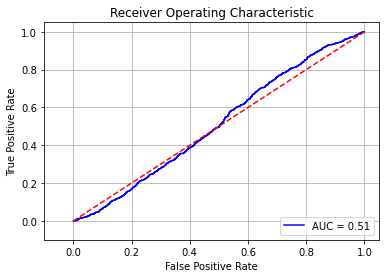

In [5]:
roc_auc, data = main.train_test_pipeline_threat(trainConfig_0, datalinks, model_path="../models/model_0.model",
                                                proxy=proxy, image_path="../images/auc_model_0.png")

Не очень

Теперь с новыми признаками:

C:\Users\aaakim10\AppData\Local\Continuum\anaconda3\envs\fraud_env\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bproxy.msk.mts.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\aaakim10\AppData\Local\Continuum\anaconda3\envs\fraud_env\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bproxy.msk.mts.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\aaakim10\AppData\Local\Continuum\anaconda3\envs\fraud_env\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bproxy.msk.mts.ru'. Adding certificate verification is strongly advised. See:

05.05 21:01 - Downloaded "https://disk.yandex.ru/d/T5CgXLvMYb0kxQ" to "../downloads/train.csv"
05.05 21:01 - TEST ROC AUC: 0.727404244497494


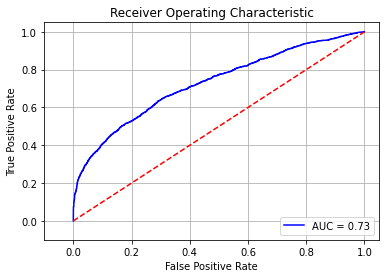

In [6]:
roc_auc, data = main.train_test_pipeline_threat(trainConfig_1, datalinks, model_path="../models/model_1.model",
                                                proxy=proxy, image_path="../images/auc_model_1.png")

Уже не так плохо

И наконец наш любимый бустинг без доппризнаков:

C:\Users\aaakim10\AppData\Local\Continuum\anaconda3\envs\fraud_env\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bproxy.msk.mts.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\aaakim10\AppData\Local\Continuum\anaconda3\envs\fraud_env\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bproxy.msk.mts.ru'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
C:\Users\aaakim10\AppData\Local\Continuum\anaconda3\envs\fraud_env\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bproxy.msk.mts.ru'. Adding certificate verification is strongly advised. See:

05.05 21:01 - Downloaded "https://disk.yandex.ru/d/T5CgXLvMYb0kxQ" to "../downloads/train.csv"
05.05 21:01 - TEST ROC AUC: 0.907069587096224


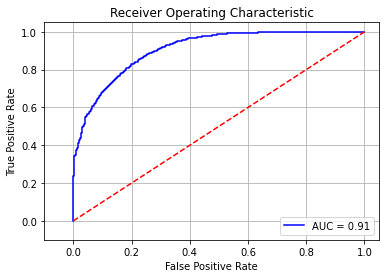

In [7]:
roc_auc, data = main.train_test_pipeline_threat(trainConfig_2, datalinks, model_path="../models/model_lgbm.model",
                                                proxy=proxy, image_path="../images/auc_model_lgbm.png")

Браво!